In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

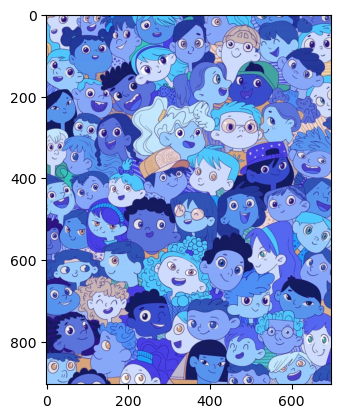

In [42]:
image = cv2.imread(r'C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Finding\1\1.jpg')
plt.imshow(image)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [43]:
object_list = [
    r"C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Finding\1\ice_cream.jpg",
    r"C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Finding\1\boat.png",
    r"C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Finding\1\ballon.png",
    r"C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Finding\1\car.png",
    r"C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Finding\1\pony.png",
    r"C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Finding\1\watermelon.png",
    r"C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Finding\1\train.png",
    r"C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Finding\1\cake.png",
    r"C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Finding\1\duck.png",
    r"C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Finding\1\grapes.png",
    r"C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Finding\1\rabbit.png",
    r"C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Finding\1\strawberry.png",
    r"C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Finding\1\teddy_bear.png",
    r"C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Finding\1\tennis_ball.png",
    r"C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Finding\1\tie.png",
]

In [44]:
output_image = image.copy()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

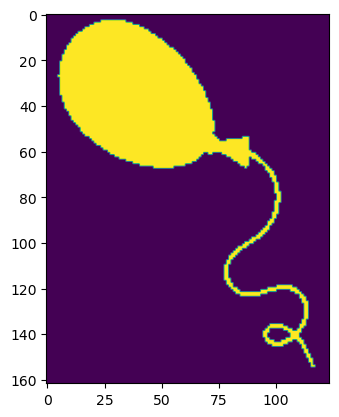

In [45]:
# test masking
def create_mask(template):
    gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(gray_template, 200, 255, cv2.THRESH_BINARY_INV)
    plt.imshow(mask)
    return mask

create_mask(cv2.imread(object_list[2]))

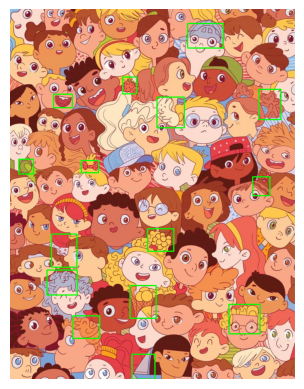

In [46]:
scales = np.linspace(0.5, 1.5, 20)  # Define a range of scales (from 50% to 150% of the template size)

# Function to create a mask that isolates the object from the background
def create_mask(template):
    gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    # Create a binary mask by thresholding the grayscale template
    _, mask = cv2.threshold(gray_template, 200, 255, cv2.THRESH_BINARY_INV)  # Adjust threshold as needed
    
    return mask

# Loop through each template in the object list
for object_path in object_list:
    # Load each template in color (do not use grayscale)
    template = cv2.imread(object_path)  # Load as color (3 channels)

    # Create a mask for the template to handle the background
    mask = create_mask(template)

    max_val_global = -1  # Initialize variable to track the highest score across all scales
    best_match_loc = None  # Store the best match location
    best_scale = None  # Store the best matching scale
    best_w, best_h = None, None  # Store the dimensions of the best match template

    # Loop over different scales
    for scale in scales:
        # Resize the template and the mask according to the scale
        resized_template = cv2.resize(template, (0, 0), fx=scale, fy=scale)
        resized_mask = cv2.resize(mask, (resized_template.shape[1], resized_template.shape[0]))

        w, h = resized_template.shape[1], resized_template.shape[0]  # Get the width and height of the resized template

        # Skip if the resized template is larger than the main image
        if w > image.shape[1] or h > image.shape[0]:
            continue

        # Perform template matching using the mask to handle background
        result = cv2.matchTemplate(image, resized_template, cv2.TM_CCOEFF_NORMED, mask=resized_mask)

        # Find the maximum value and location in the result matrix
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

        # If the current scale gives a higher score than previously, store it
        if max_val > max_val_global:
            max_val_global = max_val
            best_match_loc = max_loc
            best_scale = scale
            best_w, best_h = w, h

    # If a match was found, draw a rectangle around the best match
    if best_match_loc is not None:
        top_left = best_match_loc
        bottom_right = (top_left[0] + best_w, top_left[1] + best_h)
        cv2.rectangle(output_image, top_left, bottom_right, (0, 255, 0), 2)

# Show the result with matplotlib
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.axis('off')  # Turn off axis lines
plt.show()